# The Battle of Neighborhoods

## Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.5.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38
  vincent            conda-forge/noarch::vincent-0.4.4-py_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38haa95532_0 --> conda-forge::conda-4.9.2-py38haa244fe_0
  openssl                                         pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... failed



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




## Get data

In [2]:
import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
filename = 'newyork_data.json'
urllib.request.urlretrieve(url, filename)

('newyork_data.json', <http.client.HTTPMessage at 0x15159cca460>)

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


## Get NY coordinates

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


## NY map

In [9]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Foursquare

In [10]:
CLIENT_ID = 'PYPQMTAVDLPFBKRA5A1W2L0XYCF52MWTWX4M3Z0WXAUH4GTO' # your Foursquare ID
CLIENT_SECRET = 'FXGZ1M3LZ2Z24VZIIFR5SIBOIKLPV0PMI43DE0JDOK0025PW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [13]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,27,27,27,27,27,27
Annadale,13,13,13,13,13,13
Arden Heights,5,5,5,5,5,5
Arlington,4,4,4,4,4,4
Arrochar,21,21,21,21,21,21
Arverne,20,20,20,20,20,20
Astoria,97,97,97,97,97,97
Astoria Heights,11,11,11,11,11,11
Auburndale,19,19,19,19,19,19


## Analyzing Neighborhoods

In [14]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Erotic Museum,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaur

### Keeping only the colums we are interested in

In [103]:
cols_to_keep=["Neighborhood", "Athletics & Sports", "Sporting Goods Shop", "Sports Club", "Sports Bar", "Soccer Field", "Tennis Stadium", "Basketball Court", "Volleyball Court", "Baseball Stadium","Baseball Field", "Tennis Court"]
onehot2=onehot[cols_to_keep]

In [135]:
onehot2

,Cluster Labels,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Total
Neighborhood,,,,,,,,,,,,,
Allerton,1,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,1,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,1,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,1,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,4,1,0,0,0,0,0,0,0,0,0,0,1
Arverne,1,0,0,0,0,0,0,0,0,0,0,0,0
Astoria,1,0,0,0,0,0,0,0,0,0,0,0,0
Astoria Heights,1,0,0,0,0,0,0,0,0,0,0,0,0
Auburndale,4,1,0,0,0,0,0,0,0,0,0,0,1


In [105]:
onehot2=onehot2.groupby("Neighborhood").sum()
onehot2

,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court
Neighborhood,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,0,0,0,0,0,0,0,0,0
Arrochar,1,0,0,0,0,0,0,0,0,0,0
Arverne,0,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,0
Astoria Heights,0,0,0,0,0,0,0,0,0,0,0
Auburndale,1,0,0,0,0,0,0,0,0,0,0


## Clustering neighborhoods according to the number of sport-related venues

In [106]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(onehot2)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 4, 1, 1, 1, 4, 1])

In [107]:
# add clustering labels
clustered=onehot2.insert(0, 'Cluster Labels', kmeans.labels_)




In [108]:
merged=onehot2
merged = merged.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')

In [139]:
merged.groupby("Cluster Labels").describe()

Athletics & Sports                                          \
                            count      mean       std  min  25%  50%  75%   
Cluster Labels                                                              
0                            18.0  0.166667  0.383482  0.0  0.0  0.0  0.0   
1                           253.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
2                             3.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
3                            16.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
4                            14.0  1.000000  0.000000  1.0  1.0  1.0  1.0   

                    Sporting Goods Shop                                    \
                max               count    mean   std  min  25%  50%  75%   
Cluster Labels                                                              
0               1.0                18.0  0.0000  0.00  0.0  0.0  0.0  0.0   
1               0.0               253.0  0.0000  0.00  0.0  0.0  0.0  0.0   
2               0.0                 3.0  3.0000  0.00  3.0  3.0  3.0  3.0   
3               0.0                16.0  1.0625  0.25  1.0  1.0  1.0  1.0   
4               1.0                14.0  0.0000  0.00  0.0  0.0  0.0  0.0   

                    Sports Club                                               \
                max       count      mean       std  min  25%  50%  75%  max   
Cluster Labels                                                                 
0               0.0        18.0  0.055556  0.235702  0.0  0.0  0.0  0.0  1.0   
1               0.0       253.0  0.003953  0.062869  0.0  0.0  0.0  0.0  1.0   
2               3.0         3.0  0.333333  0.577350  0.0  0.0  0.0  0.5  1.0   
3               2.0        16.0  0.062500  0.250000  0.0  0.0  0.0  0.0  1.0   
4               0.0        14.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               Sports Bar                                               \
                    count      mean       std  min  25%  50%  75%  max   
Cluster Labels                                                           
0                    18.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                   253.0  0.035573  0.185590  0.0  0.0  0.0  0.0  1.0   
2                     3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                    16.0  0.062500  0.250000  0.0  0.0  0.0  0.0  1.0   
4                    14.0  0.142857  0.534522  0.0  0.0  0.0  0.0  2.0   

               Soccer Field                                               \
                      count      mean       std  min  25%  50%  75%  max   
Cluster Labels                                                             
0                      18.0  0.055556  0.235702  0.0  0.0  0.0  0.0  1.0   
1                     253.0  0.003953  0.062869  0.0  0.0  0.0  0.0  1.0   
2                       3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                      16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                      14.0  0.071429  0.267261  0.0  0.0  0.0  0.0  1.0   

               Tennis Stadium                                               \
                        count      mean       std  min  25%  50%  75%  max   
Cluster Labels                                                               
0                        18.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
1                       253.0  0.007905  0.088734  0.0  0.0  0.0  0.0  1.0   
2                         3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3                        16.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4                        14.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               Basketball Court                                               \
                          count      mean       std  min  25%  50%  75%  max   
Cluster Labels                                                                 
0                          18.0  0.166667  0.383482  0.0  0.0  0.0  0.0  

## Mapping clustered neighborhoods

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged.index, merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Describing clusters

In [111]:
meanVenues= merged.groupby("Cluster Labels").mean()

In [112]:
meanVenues=meanVenues.drop(["Latitude","Longitude"], axis=1)

In [113]:
meanVenues #This dataframe represents the average number of the different venues in each cluster

,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court
Cluster Labels,,,,,,,,,,,
0,0.166667,0.0000,0.055556,0.000000,0.055556,0.000000,0.166667,0.000000,0.000000,1.111111,0.000000
1,0.000000,0.0000,0.003953,0.035573,0.003953,0.007905,0.031621,0.003953,0.007905,0.000000,0.039526
2,0.000000,3.0000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.0625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500
4,1.000000,0.0000,0.000000,0.142857,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429


<AxesSubplot:xlabel='Cluster Labels'>

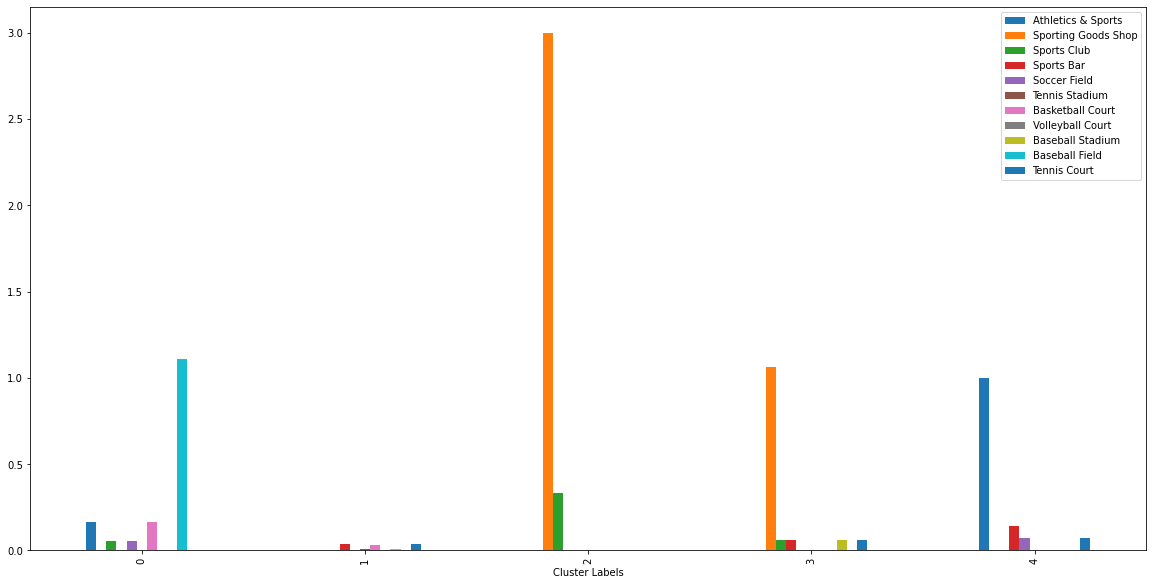

In [114]:
import seaborn as sns
meanVenues.plot(kind="bar", figsize=(20,10))

In [115]:
meanVenues['Total'] = meanVenues.sum(axis=1)
meanVenues

,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Total
Cluster Labels,,,,,,,,,,,,
0,0.166667,0.0000,0.055556,0.000000,0.055556,0.000000,0.166667,0.000000,0.000000,1.111111,0.000000,1.555556
1,0.000000,0.0000,0.003953,0.035573,0.003953,0.007905,0.031621,0.003953,0.007905,0.000000,0.039526,0.134387
2,0.000000,3.0000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333
3,0.000000,1.0625,0.062500,0.062500,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,1.312500
4,1.000000,0.0000,0.000000,0.142857,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,1.285714


#### We can see that, on average, cluster 2 has the highest number of venues, particularly sporting goods shops and sports bar. Nevertheless, cluster 0 may be a better choice, since its venues are characterized by a much higher variety (Basebaall fields, Athletics and Sports, Basketball Court, Soccer field and Sports Club.


## Neighborhoods in cluster 0

In [117]:
onlyC0=merged["Cluster Labels"]==0
cluster0=merged[onlyC0]

In [118]:
cluster0

,Cluster Labels,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Borough,Latitude,Longitude
Neighborhood,,,,,,,,,,,,,,,
Bedford Park,0,0,0,0,0,0,0,0,0,0,1,0,Bronx,40.870185,-73.885512
Bergen Beach,0,1,0,0,0,0,0,0,0,0,1,0,Brooklyn,40.615150,-73.898556
Bulls Head,0,0,0,0,0,0,0,0,0,0,1,0,Staten Island,40.609592,-74.159409
Butler Manor,0,0,0,0,0,0,0,0,0,0,2,0,Staten Island,40.506082,-74.229504
City Island,0,0,0,0,0,0,0,0,0,0,1,0,Bronx,40.847247,-73.786488
Co-op City,0,0,0,0,0,0,0,1,0,0,1,0,Bronx,40.874294,-73.829939
Gerritsen Beach,0,0,0,0,0,0,0,0,0,0,1,0,Brooklyn,40.590848,-73.930102
Glendale,0,0,0,0,0,0,0,0,0,0,1,0,Queens,40.702762,-73.870742
Hollis,0,0,0,0,0,0,0,0,0,0,2,0,Queens,40.711243,-73.759250


<AxesSubplot:xlabel='Neighborhood'>

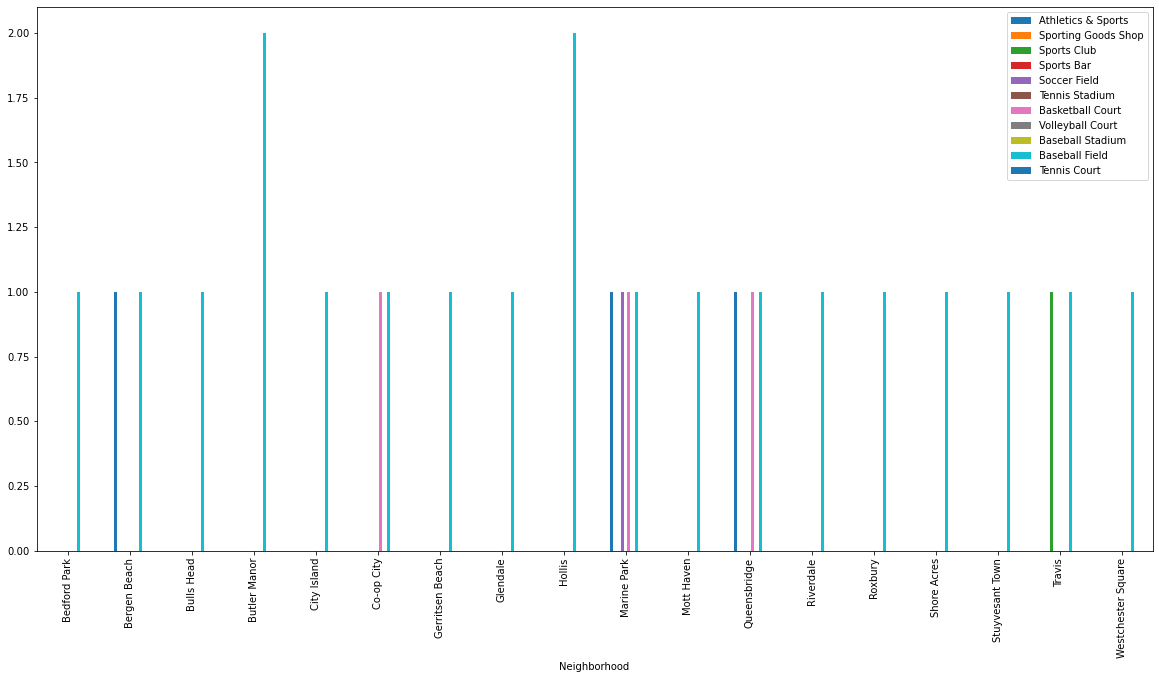

In [119]:
cluster0.drop(["Latitude", "Longitude", "Cluster Labels"], axis=1).plot(kind="bar", figsize=(20,10))

In [133]:
cluster0['Total'] = cluster0.drop(["Latitude", "Longitude", "Total"], axis=1).sum(axis=1)
cluster0.sort_values(by="Total", ascending=False).head()

<ipython-input-133-d1593d7af7fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['Total'] = cluster0.drop(["Latitude", "Longitude", "Total"], axis=1).sum(axis=1)


,Cluster Labels,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Borough,Latitude,Longitude,Total
Neighborhood,,,,,,,,,,,,,,,,
Marine Park,0,1,0,0,0,1,0,1,0,0,1,0,Brooklyn,40.609748,-73.931344,4
Queensbridge,0,1,0,0,0,0,0,1,0,0,1,0,Queens,40.756091,-73.945631,3
Travis,0,0,0,1,0,0,0,0,0,0,1,0,Staten Island,40.586314,-74.190737,2
Butler Manor,0,0,0,0,0,0,0,0,0,0,2,0,Staten Island,40.506082,-74.229504,2
Co-op City,0,0,0,0,0,0,0,1,0,0,1,0,Bronx,40.874294,-73.829939,2


In [142]:
cluster0.sort_values(by="Total", ascending=False).head().to_excel("E:\Desktop\cl0.xlsx")

#### Among cluster 0 neighborhoods, Marine Park is the one including the highest number and variety of venues.

## Cluster 2 neighborhoods

In [124]:
onlyC2=merged["Cluster Labels"]==2
cluster2=merged[onlyC2]

<AxesSubplot:xlabel='Neighborhood'>

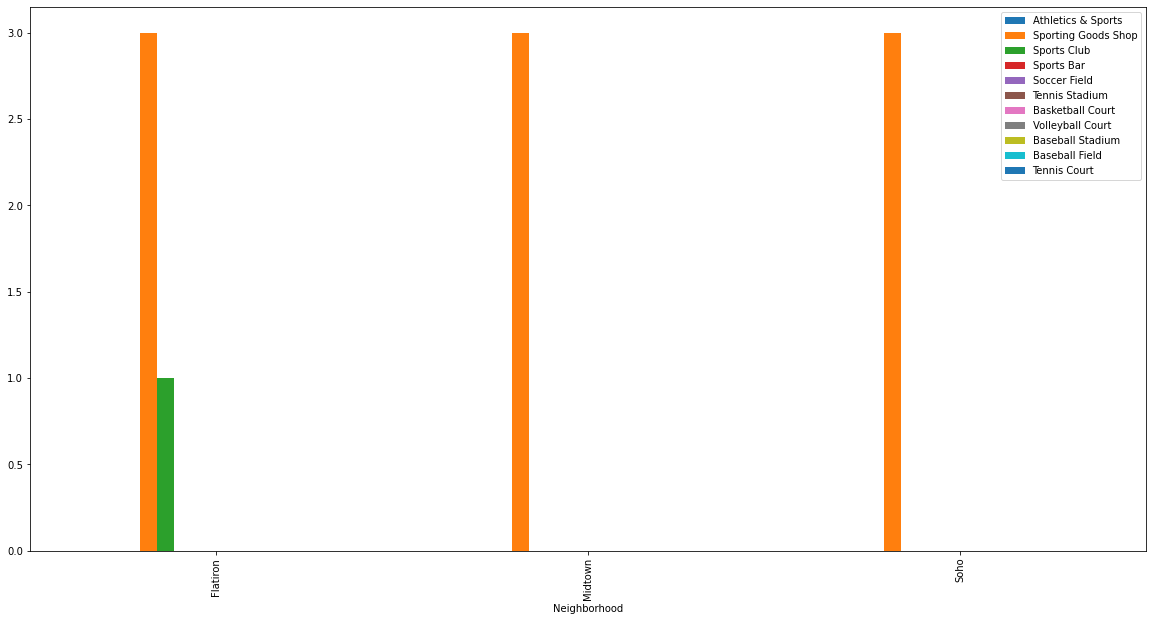

In [125]:
cluster2.drop(["Latitude", "Longitude", "Cluster Labels"], axis=1).plot(kind="bar", figsize=(20,10))

In [129]:
cluster2['Total'] = cluster2.drop(["Latitude", "Longitude", "Cluster Labels", "Total"], axis=1).sum(axis=1)
cluster2.sort_values(by="Total", ascending=False).head()

<ipython-input-129-ac1b866a65bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['Total'] = cluster2.drop(["Latitude", "Longitude", "Cluster Labels", "Total"], axis=1).sum(axis=1)


,Cluster Labels,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Borough,Latitude,Longitude,Total
Neighborhood,,,,,,,,,,,,,,,,
Flatiron,2,0,3,1,0,0,0,0,0,0,0,0,Manhattan,40.739673,-73.990947,4
Midtown,2,0,3,0,0,0,0,0,0,0,0,0,Manhattan,40.754691,-73.981669,3
Soho,2,0,3,0,0,0,0,0,0,0,0,0,Manhattan,40.722184,-74.000657,3


In [143]:
cluster2.sort_values(by="Total", ascending=False).head().to_excel("E:\Desktop\cl2.xlsx")

#### Among cluster 2 neighborhoods, Flatiron would be the most suitable, including 4 venues (3 sporting goods shop and 1 sports club).

## Check on all the unclustered neighborhoods

In [131]:
onehot2["Total"]=onehot2.drop(["Cluster Labels"], axis=1).sum(axis=1)


In [132]:
onehot2.sort_values(by="Total", ascending=False).head(10) #Top 10 neighborhoods for number of venues

,Cluster Labels,Athletics & Sports,Sporting Goods Shop,Sports Club,Sports Bar,Soccer Field,Tennis Stadium,Basketball Court,Volleyball Court,Baseball Stadium,Baseball Field,Tennis Court,Total
Neighborhood,,,,,,,,,,,,,
Flatiron,2,0,3,1,0,0,0,0,0,0,0,0,4
Marine Park,0,1,0,0,0,1,0,1,0,0,1,0,4
Soho,2,0,3,0,0,0,0,0,0,0,0,0,3
Midtown,2,0,3,0,0,0,0,0,0,0,0,0,3
Queensbridge,0,1,0,0,0,0,0,1,0,0,1,0,3
Sunnyside Gardens,4,1,0,0,2,0,0,0,0,0,0,0,3
St. George,3,0,2,0,0,0,0,0,0,1,0,0,3
Yorkville,4,1,0,0,0,1,0,0,0,0,0,0,2
Co-op City,0,0,0,0,0,0,0,1,0,0,1,0,2


#### These results confirm that Cluster 0 and 2 are the best clusters and that Flatiron and Marine Park includes the highest number of venues.